<div style="text-align: center; font-family: Arial, sans-serif;">
    <h1 style="font-size: 30px; color: #2196F3;">ALY 6020 : Predictive Analytics</h1>
    <h3 style="font-size: 16px; color: #9C27B0;">Prof. Sudesh Shetty</h3>
    <h3 style="font-size: 16px; color: #9C27B0;">Final Project</h3>
    <h3 style="font-size: 16px; color: #9C27B0;">Topic: Predicting Vehicle Loan Default for a Non-Banking Financial Institution</h3>
    <h3 style="font-size: 14px; color: #9C27B0;">Date: 5th February 2025</h3>
</div>

## Problem Statement:

A non-banking financial institution (NBFI) is experiencing financial losses due to an increasing number of defaults in its vehicle loan portfolio. To mitigate this risk, the company seeks to develop a predictive model that assesses a client's ability to repay loans. By leveraging historical data, the model will help identify high-risk clients and enable data-driven credit decision-making.

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import time
import pyodbc
from sklearn.utils import resample
print(pyodbc.drivers())
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, auc
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
from scipy import stats
import random
random.seed(42)

['SQL Server', 'ODBC Driver 17 for SQL Server', 'SQL Server Native Client RDA 11.0', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)', 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)']


## Loading Dataset

In [5]:
data_temp = pd.read_csv(r"../data/NBFIData.csv")

In [6]:
data = data_temp.copy(deep=True)
data.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Client_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Defaulters
0,12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.0,21.0,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790.0,5102.0,NaN,331.0,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195.0,365243.0,NaN,775.0,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366.0,2977.0,5516.0,4043.0,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [7]:
data.describe()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Client_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Defaulters
count,1.217870e+05,1.181820e+05,118207.000000,118163.000000,118154.000000,118129.000000,118152.000000,118156.000000,116976.000000,116930.000000,118188.000000,118138.000000,118173.000000,115822.000000,41737.000000,121787.000000,121787.000000,121787.000000,119379.000000,119383.000000,119360.000000,118132.000000,52996.000000,116105.000000,94876.000000,59899.000000,118126.000000,103254.000000,121787.000000
mean,1.216093e+07,1.686508e+04,0.342848,0.332295,0.499196,0.692074,0.417826,60044.941824,2721.245116,0.022602,16027.332927,67151.764470,4975.303775,2987.399138,12.154252,0.999992,0.200506,0.281220,2.154407,2.030071,3.159593,12.063074,0.501209,0.518631,0.511190,0.117424,962.078780,1.891200,0.080780
std,3.517759e+04,1.153903e+04,0.474663,0.471038,0.500001,0.461638,0.728860,40350.965273,1461.542602,0.413719,4366.349555,138969.983496,3514.741831,1511.911749,12.053055,0.002865,0.400380,0.449597,0.912729,0.504441,1.759073,3.280638,0.211204,0.740441,0.194322,0.107978,827.886635,1.861961,0.272499
min,1.210000e+07,2.565000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4500.000000,217.350000,0.000533,7676.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000527,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,1.125000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,27000.000000,1657.350000,0.010006,12398.000000,932.000000,2008.000000,1705.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390186,0.372334,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,1.440000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,51750.000000,2499.750000,0.018850,15734.000000,2212.000000,4493.000000,3242.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504723,0.564989,0.537070,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,2.025000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,80865.000000,3466.800000,0.028663,19661.000000,5634.000000,7464.000000,4295.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.663998,0.667458,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.800009e+06,1.000000,1.000000,1.000000,1.000000,19.000000,405000.000000,22500.000000,100.000000,25201.000000,365243.000000,23738.000000,7197.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,0.896010,1.000000,4185.000000,22.000000,1.000000


## 1. Cleaning Data

In [8]:
data.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Client_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Defaulters'],
      dtype='object')

### 1.1 Duplicates Check

In [9]:
data.duplicated().sum()

0

### 1.2 Missing Value Check

In [10]:
data.rename(columns= {'Defaulters':'Default'}, inplace=True)
data['Default'].value_counts()

Default
0    111949
1      9838
Name: count, dtype: int64

In [11]:
# Calculate missing value percentage
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Display the result
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print(missing_percentage)

Own_House_Age                 65.729511
Score_Source_1                56.484682
Social_Circle_Default         50.816590
Client_Occupation             34.002808
Score_Source_3                22.096776
Credit_Bureau                 15.217552
ID_Days                        4.897896
Score_Source_2                 4.665523
Population_Region_Relative     3.988110
Loan_Annuity                   3.950340
Client_Income_Type             3.037270
Client_Housing_Type            3.026596
Phone_Change                   3.006068
House_Own                      3.003605
Application_Process_Hour       3.001141
Employed_Days                  2.996215
Loan_Contract_Type             2.994572
Client_Education               2.991288
Child_Count                    2.984719
Active_Loan                    2.983077
Credit_Amount                  2.981435
Bike_Owned                     2.975687
Registration_Days              2.967476
Type_Organization              2.961728
Client_Income                  2.960086


Dropping Columns with More Than 30% Missing Values.
- Own_House_Age (65.73%)
- Score_Source_1 (56.49%)
- Social_Circle_Default (50.82%)
- Client_Occupation (34%
)

In [12]:
data.drop(columns={'Own_House_Age', 'Score_Source_1', 'Social_Circle_Default', 'Client_Occupation'}, inplace=True)
data.shape

(121787, 36)

#### 1.2.1 Missing Value Treatment

In [14]:
# Numerical columns -> Filling with the median value
num_cols = data.select_dtypes(include=['int', 'float']).columns
num_cols

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Mobile_Tag', 'Homephone_Tag',
       'Workphone_Working', 'Client_Family_Members', 'Client_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_2',
       'Score_Source_3', 'Phone_Change', 'Credit_Bureau', 'Default'],
      dtype='object')

In [15]:
def impute_missing_values(data, numerical_cols):
    """
    Impute missing values for numeric columns using mean or median based on business context.

    Parameters:
        data (pd.DataFrame): Input DataFrame with missing values.
        numerical_cols (list): List of numeric column names.

    Returns:
        pd.DataFrame: DataFrame with imputed values.
    """
    # Variables to impute with mean
    mean_cols = [
        "Client_Income", "Credit_Amount", "Loan_Annuity",
        "Population_Region_Relative", "Score_Source_2", "Score_Source_3"
    ]

    # Variables to impute with median
    median_cols = [
        col for col in numerical_cols if col not in mean_cols
    ]

    # Impute mean columns
    for col in mean_cols:
        if col in data.columns:
            data[col].fillna(data[col].mean(), inplace=True)

    # Impute median columns
    for col in median_cols:
        if col in data.columns:
            data[col].fillna(data[col].median(), inplace=True)

    return data

In [16]:
# Apply the function
data = impute_missing_values(data, num_cols)

In [22]:
data.describe()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Client_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
count,1.217870e+05,1.217870e+05,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000,121787.000000
mean,1.216093e+07,1.686508e+04,0.332770,0.322407,0.484305,0.701323,0.405355,60044.941824,2721.245116,0.022602,16018.664472,65206.029699,4960.991526,2999.869222,0.999992,0.200506,0.281220,2.151354,2.029478,3.156412,12.061181,0.518631,0.511190,955.853851,1.755581,0.080780
std,3.517759e+04,1.136697e+04,0.471207,0.467400,0.499756,0.457680,0.721413,39744.889817,1432.383543,0.405385,4301.635740,137319.239708,3463.166284,1475.444259,0.002865,0.400380,0.449597,0.903917,0.499455,1.741600,3.231052,0.722962,0.171514,816.114541,1.744073,0.272499
min,1.210000e+07,2.565000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4500.000000,217.350000,0.000533,7676.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000005,0.000527,0.000000,0.000000,0.000000
25%,1.213046e+07,1.125000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,27450.000000,1687.500000,0.010032,12511.000000,961.000000,2101.000000,1789.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.402068,0.424130,287.000000,1.000000,0.000000
50%,1.216093e+07,1.575000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,52359.750000,2561.400000,0.019101,15734.000000,2212.000000,4493.000000,3242.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.553179,0.511190,755.000000,1.000000,0.000000
75%,1.219139e+07,2.025000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,80865.000000,3408.750000,0.026392,19544.000000,5386.500000,7350.000000,4263.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.659828,0.631355,1550.000000,3.000000,0.000000
max,1.222186e+07,1.800009e+06,1.000000,1.000000,1.000000,1.000000,19.000000,405000.000000,22500.000000,100.000000,25201.000000,365243.000000,23738.000000,7197.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,100.000000,0.896010,4185.000000,22.000000,1.000000


In [23]:
data = data[data["Score_Source_2"] <=1] # as it is given Score_source_2 is between 0 and 1
data = data[data["Employed_Days"] <= 21900] #considering 60 years of employment max
data.reset_index(drop=True, inplace=True)
data.shape

(100694, 36)

In [24]:
# categorical columns-> Filling with the mode value
cat_cols = ['Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Type_Organization']

In [25]:
def impute_categorical_columns(data, categorical_cols):
    """
    Impute missing values in categorical columns using the mode (most frequent value).

    Parameters:
        data (pd.DataFrame): The DataFrame containing categorical data.
        categorical_cols (list): List of categorical column names.

    Returns:
        pd.DataFrame: DataFrame with imputed categorical values.
    """
    for col in categorical_cols:
        if col in data.columns:
            # Impute missing values with mode (most frequent value)
            mode_value = data[col].mode()[0]  # Get the most frequent value
            data[col].fillna(mode_value, inplace=True)
            print(f"Missing values in '{col}' imputed with mode: {mode_value}")
    
    return data

In [26]:
# Applying the function
data = impute_categorical_columns(data, cat_cols)

Missing values in 'Accompany_Client' imputed with mode: Alone
Missing values in 'Client_Income_Type' imputed with mode: Service
Missing values in 'Client_Education' imputed with mode: Secondary
Missing values in 'Client_Marital_Status' imputed with mode: M
Missing values in 'Client_Gender' imputed with mode: Male
Missing values in 'Loan_Contract_Type' imputed with mode: CL
Missing values in 'Client_Housing_Type' imputed with mode: Home
Missing values in 'Type_Organization' imputed with mode: Business Entity Type 3


In [27]:
data.isna().sum()

ID                            0
Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Family_Members         0
Client_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Score_So

### 1.3 Outlier Check

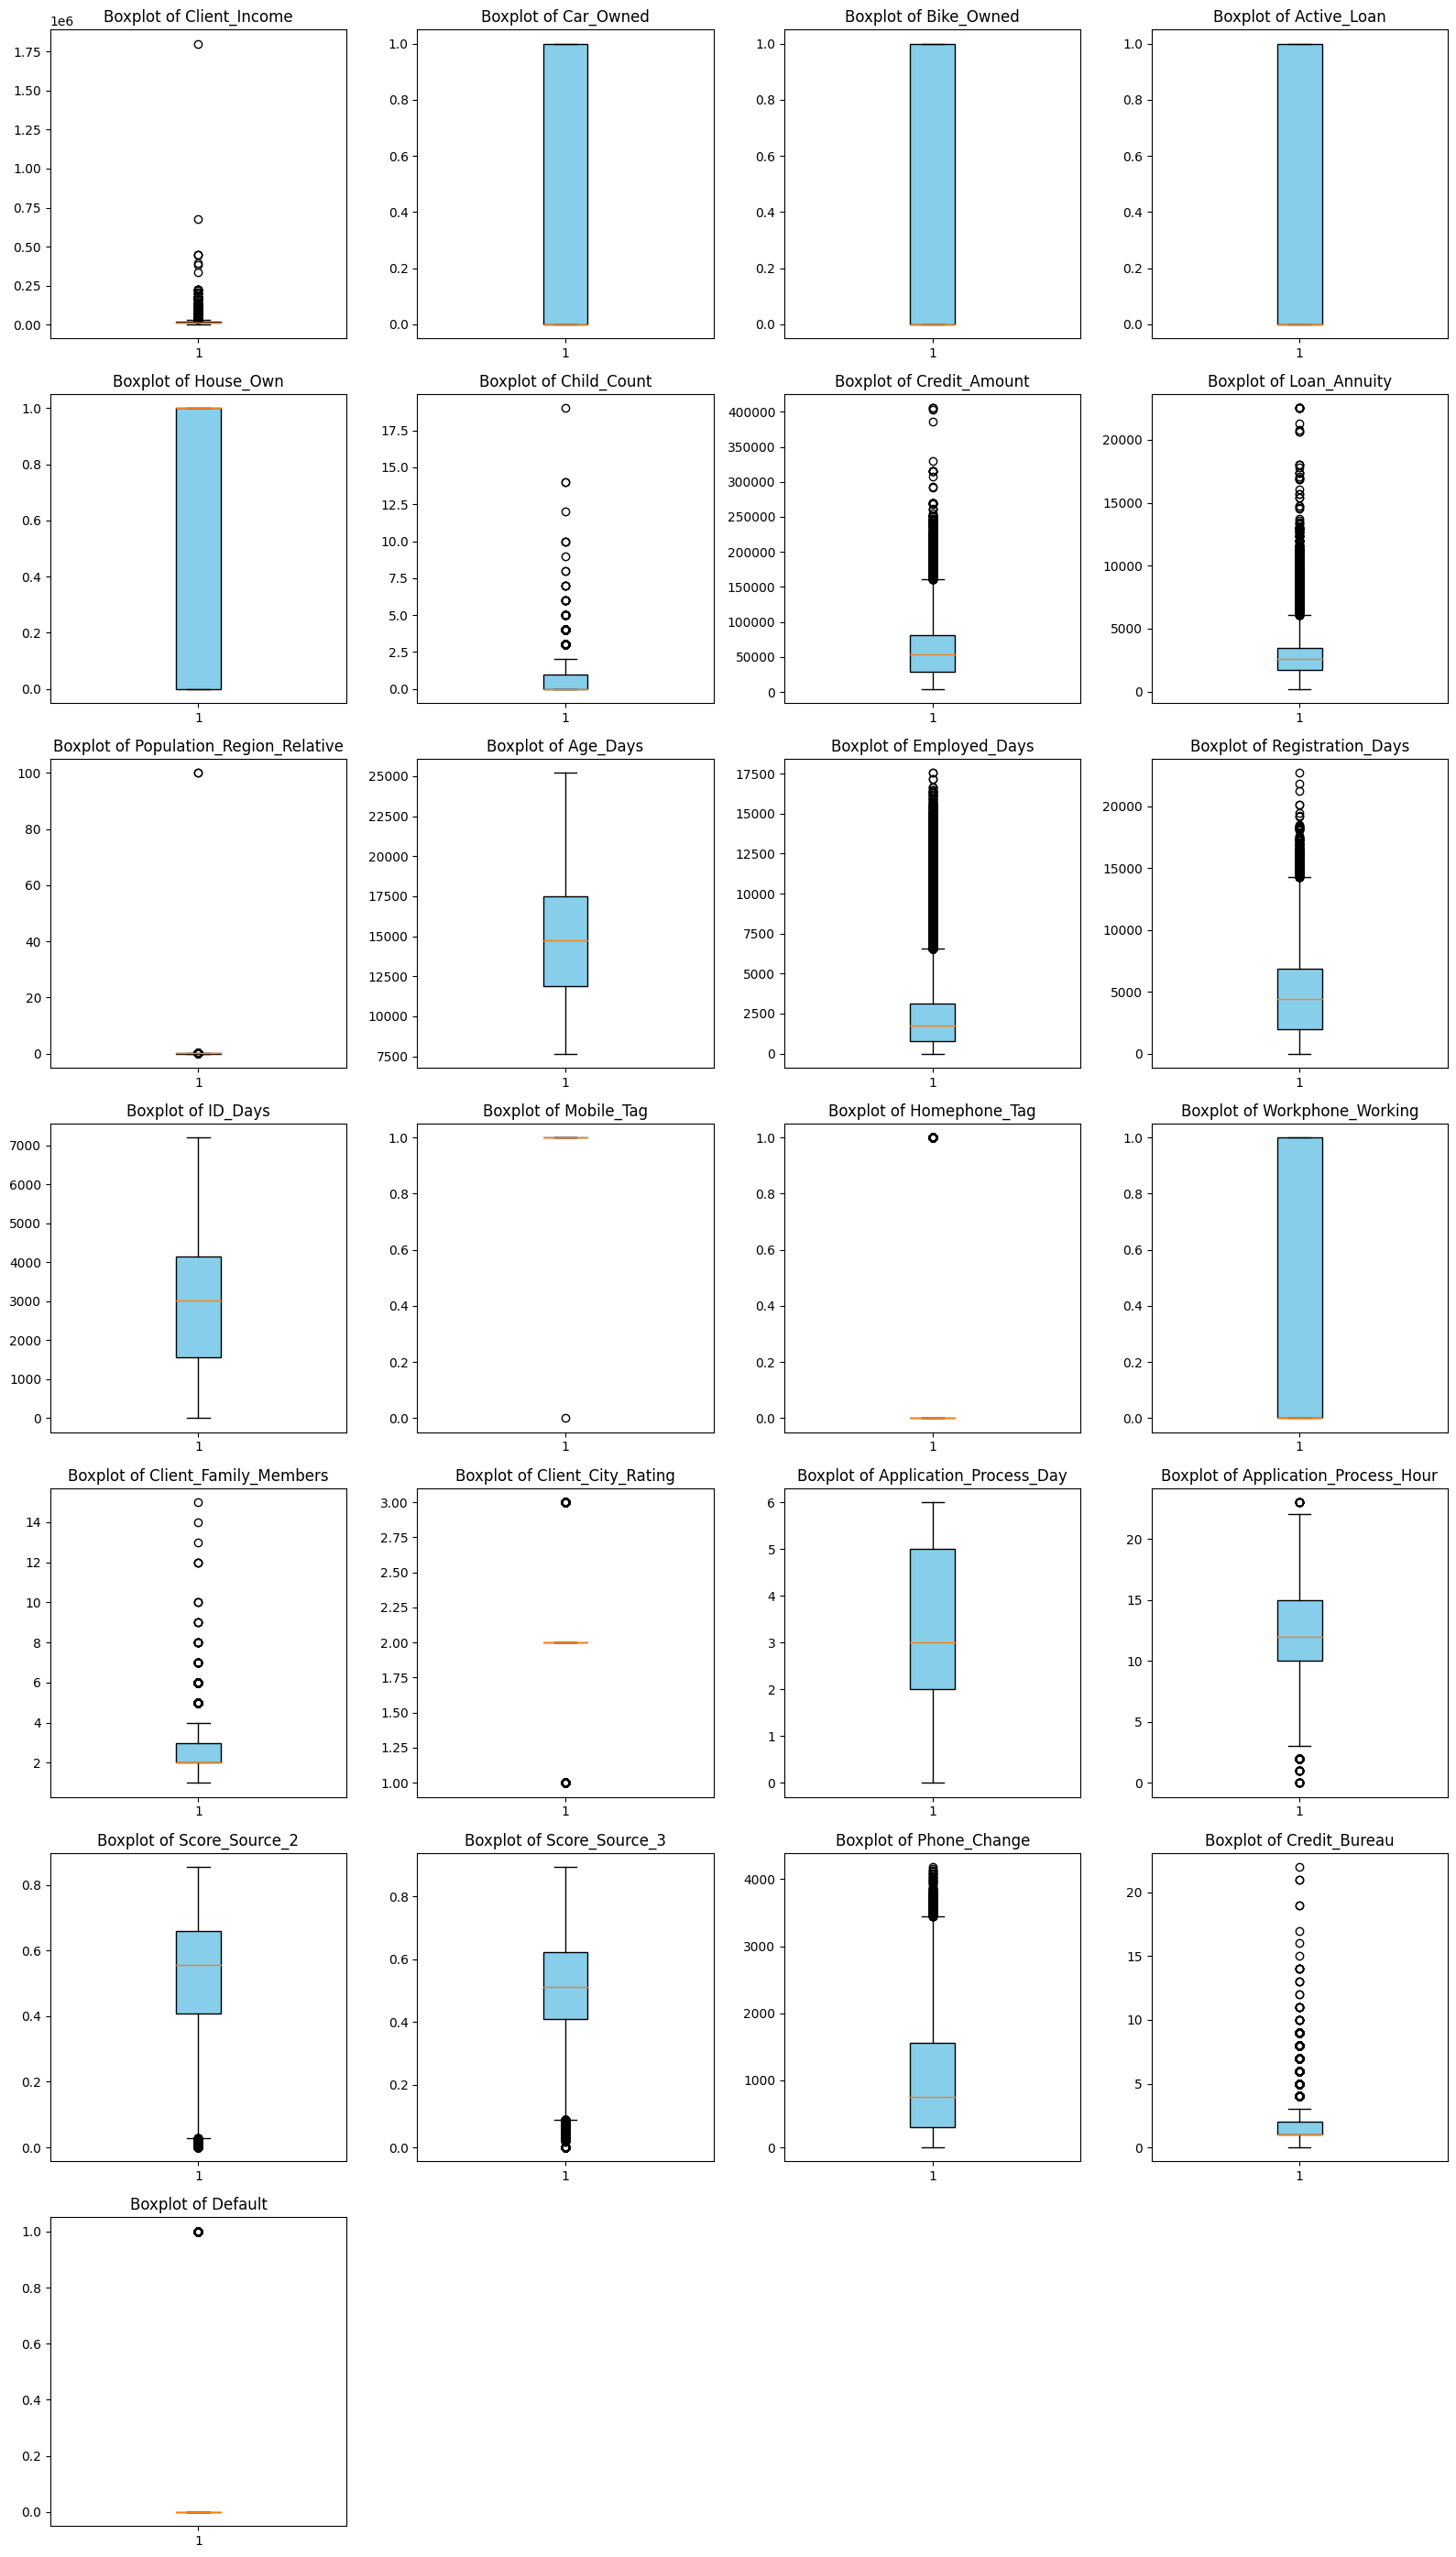

In [28]:
# Identify numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns[1:]  # Exclude 'ID' column
numeric_data = data[numeric_cols]  # Subset numeric data

# Set up the grid layout for multiple boxplots
num_cols = len(numeric_cols)
rows = (num_cols // 4) + (num_cols % 4 > 0)  # Arrange in 4 columns

plt.figure(figsize=(16, rows * 4))  # Adjust figure size dynamically

# Plot boxplots for each numeric variable
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, 4, i)  # Define subplot grid
    plt.boxplot(numeric_data[col].dropna(), patch_artist=True, boxprops=dict(facecolor="skyblue"))
    plt.title(f"Boxplot of {col}")

plt.tight_layout()  # Adjust layout for better visualization
plt.show()

Variables with Outliers:

- Client_Income: Significant outliers with very high values, indicating income inequality among clients.
- Credit_Amount: Wide range with outliers representing large loan requests.
- Loan_Annuity: A few extreme values, likely due to incorrect or edge-case entries.
- Registration_Days: Outliers representing unusual registration timing.
- Employed Days: Bunch of outliers represent more job experience
- Family Members: Few Outliers representing high count of family members
- Phone_Change: Outliers indicate clients changing phones either very recently or a long time ago.
- Child Count:  Few irregular entries we can see above 15 for ex. 
- Score Source 3: Has some outliers in 25% 
- Credit Bureau: Set of customers have more credit inquiries

Other Variables:

- Most variables (e.g., Car_Owned, Application_Process_Hour) have small ranges or are binary/discrete, so outliers aren't impactful or meaningful for treatment.

In [30]:
data.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Family_Members',
       'Client_City_Rating', 'Application_Process_Day',
       'Application_Process_Hour', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_2',
       'Score_Source_3', 'Phone_Change', 'Credit_Bureau', 'Default'],
      dtype='object')

In [29]:
def treat_outliers_iqr(df, column):
    """
    Treat outliers in a specified column using the IQR method.
    Values outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR] are capped.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        column (str): The column name to treat outliers.
    
    Returns:
        pd.Series: The column with outliers capped.
    """
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    return df[column].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

In [31]:
# Columns to treat
columns_to_treat = ['Client_Income', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Employed_Days', 'Population_Region_Relative', 'Score_Source_2', 'Score_Source_3',
 'Employed_Days', 'Registration_Days', 'Phone_Change', 'Client_Family_Members', 'Score_Source_3', 'Credit_Bureau']

# Apply IQR-based outlier treatment
for col in columns_to_treat:
    data[col] = treat_outliers_iqr(data, col)

## 2. Exploratory Data Analysis (EDA)

### 2.1 Univariate Analysis

#### 2.1.1 Numerical Columns

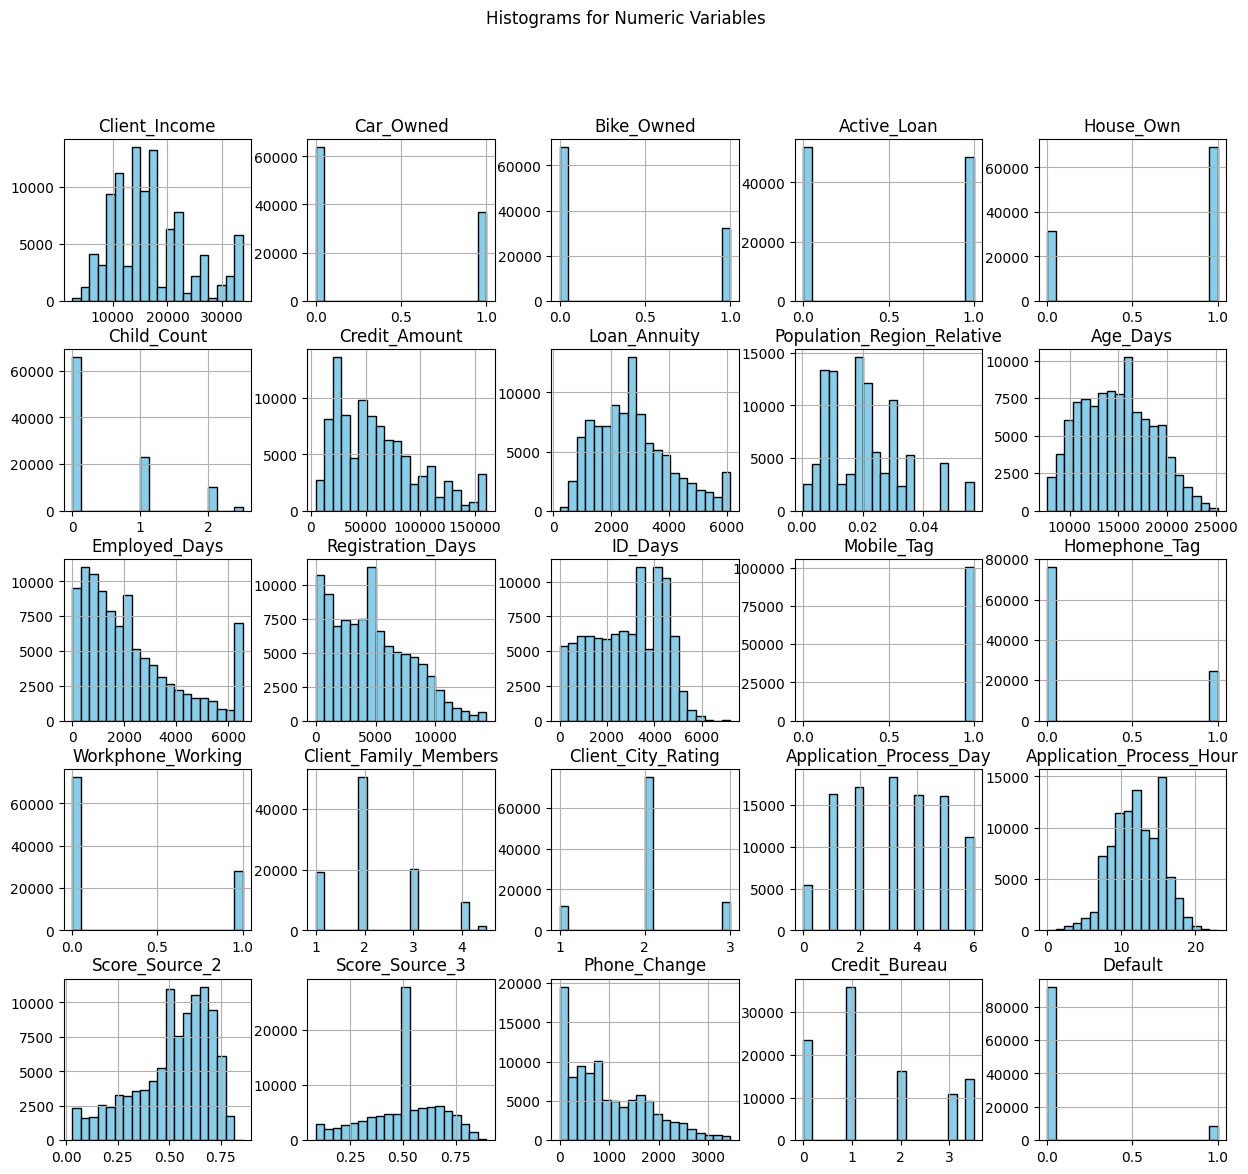

In [32]:
# Plot histograms for numeric variables
data[numeric_cols].hist(figsize=(15, 13), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms for Numeric Variables")
plt.show()

In [33]:
categorical_cols = data.select_dtypes(include=['object']).columns[:-2] # Exclude 'Type_Organization' column which has lot of categories & 'Default' 
categorical_cols

Index(['Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Client_Permanent_Match_Tag'],
      dtype='object')

#### 2.1.2 Categorical Variables

In [34]:
def analyze_categorical_column(data, col, figsize=(10, 6), palette="viridis"):
    """
    Generate a bar plot for a categorical column and provide analysis.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        col (str): The column name to analyze.
        figsize (tuple): The size of the plot (default is (10, 6)).
        palette (str): The color palette for the bar plot.

    Returns:
        None: Displays the plot and prints the analysis.
    """
    if col not in data.columns:
        print(f"Column '{col}' not found in the dataset.")
        return
    
    # Analysis: Value counts and missing values
    print(f"\nAnalysis for '{col}':")
    print("-" * 50)
    print(f"Unique Categories: {data[col].nunique()}")
    print(f"Categories:\n{data[col].value_counts()}")
    print(f"Missing Values: {data[col].isnull().sum()} ({data[col].isnull().mean() * 100:.2f}%)")
    print("-" * 50)

    # Plot: Bar plot for the categorical column
    plt.figure(figsize=figsize)
    sns.countplot(data=data, x=col, palette=palette, order=data[col].value_counts().index)
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [35]:
data.select_dtypes(include=['object']).columns

Index(['Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization'],
      dtype='object')


Analysis for 'Client_Income_Type':
--------------------------------------------------
Unique Categories: 8
Categories:
Client_Income_Type
Service            64007
Commercial         27747
Govt Job            8298
Retired              630
Student                8
Maternity leave        2
Unemployed             1
Businessman            1
Name: count, dtype: int64
Missing Values: 0 (0.00%)
--------------------------------------------------


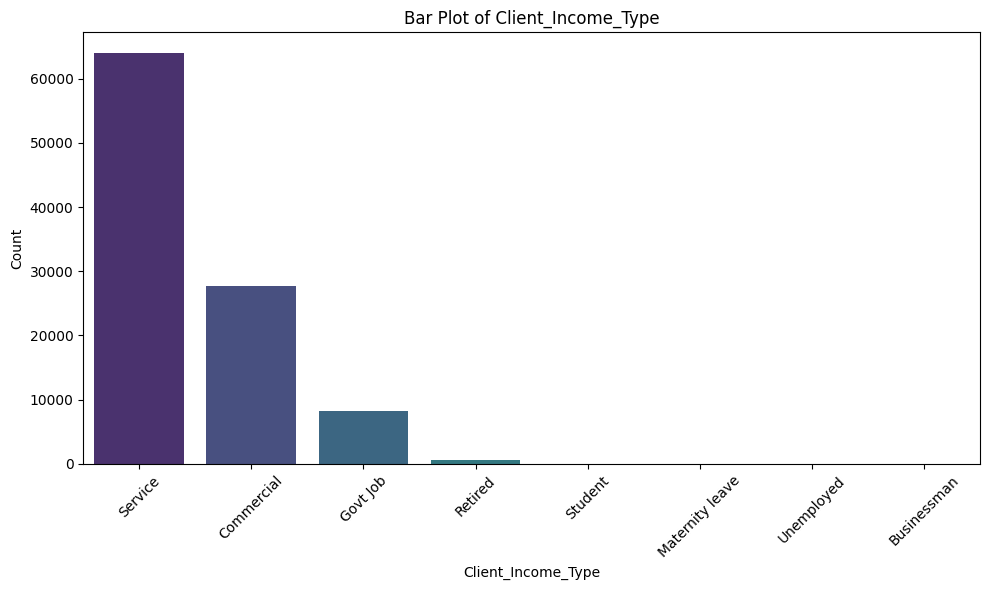

In [37]:
analyze_categorical_column(data, "Client_Income_Type")

The column Client_Income_Type contains 8 unique categories, but some categories (e.g., Student, Unemployed, Maternity leave, Businessman) have very few records. These rare categories might not provide significant value in modeling and could be grouped into a single category to reduce dimensionality.


Analysis for 'Accompany_Client':
--------------------------------------------------
Unique Categories: 7
Categories:
Accompany_Client
Alone       82360
Relative    12564
Partner      3887
Kids          950
Others        839
Group          85
##              9
Name: count, dtype: int64
Missing Values: 0 (0.00%)
--------------------------------------------------


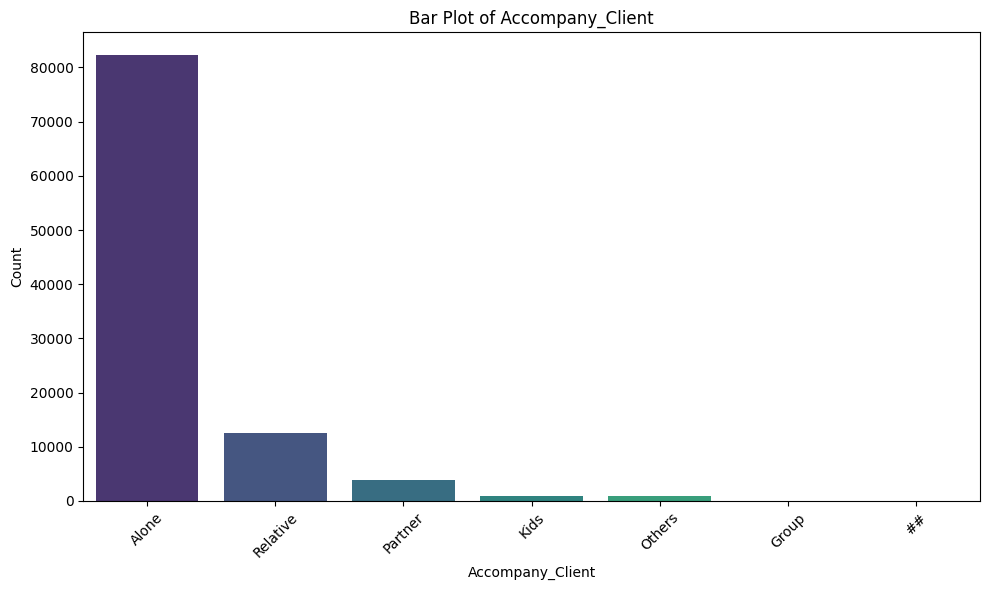

In [38]:
analyze_categorical_column(data, "Accompany_Client")

The column Accompany_Client has 7 unique categories, with the majority of clients applying alone (82,360) or with a relative (12,564). Rare categories like Group (85), Others (839), and invalid/placeholder values like ## (9) represent a small portion of the data and could be grouped into a single category, such as "Other", for simplification.


Analysis for 'Loan_Contract_Type':
--------------------------------------------------
Unique Categories: 2
Categories:
Loan_Contract_Type
CL    90838
RL     9856
Name: count, dtype: int64
Missing Values: 0 (0.00%)
--------------------------------------------------


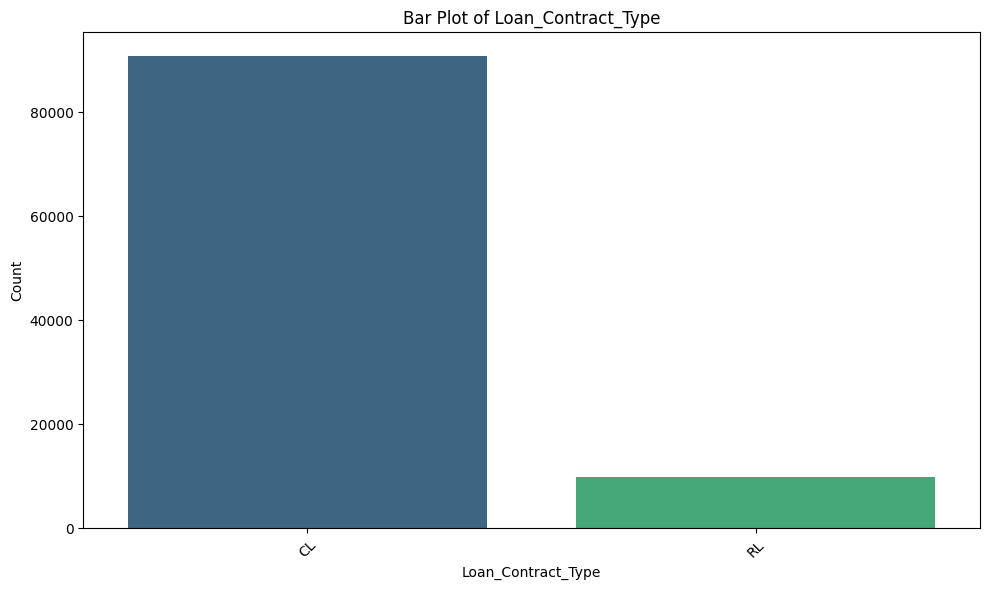

In [39]:
analyze_categorical_column(data, "Loan_Contract_Type")


Analysis for 'Default':
--------------------------------------------------
Unique Categories: 2
Categories:
Default
0    92022
1     8672
Name: count, dtype: int64
Missing Values: 0 (0.00%)
--------------------------------------------------


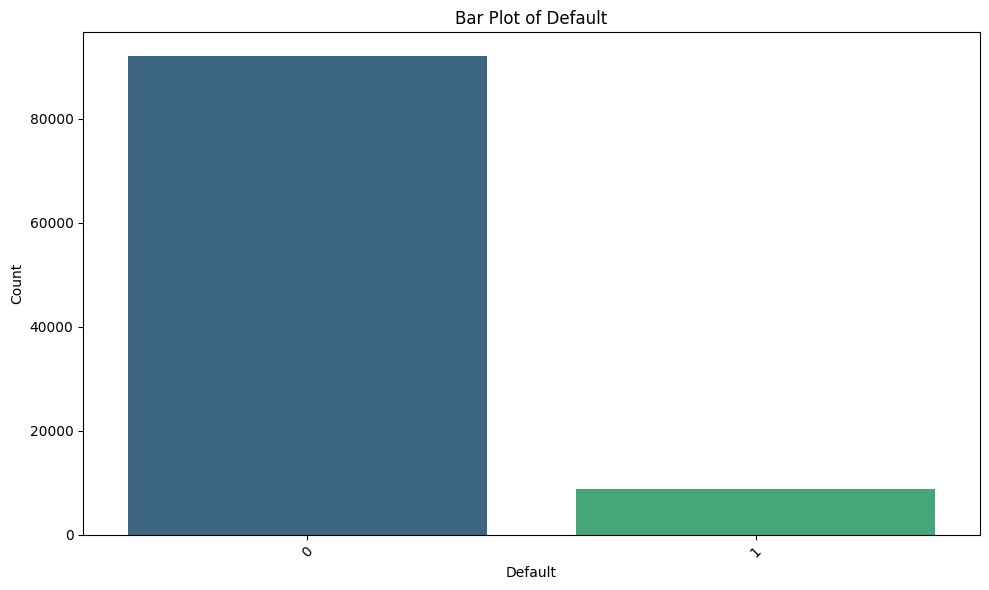

In [40]:
analyze_categorical_column(data, "Default")

The target variable Default is binary with two categories:

- 0 (No Default): 92,022 records (91.92%)
- 1 (Default): 8672 records (8.08%)
The dataset is imbalanced, with a significantly larger proportion of clients who did not default compared to those who did. This imbalance may affect model performance and may require techniques like oversampling (e.g., SMOTE), undersampling, or class weighting to address it during modeling.


Analysis for 'Loan_Contract_Type':
--------------------------------------------------
Unique Categories: 2
Categories:
Loan_Contract_Type
CL    90838
RL     9856
Name: count, dtype: int64
Missing Values: 0 (0.00%)
--------------------------------------------------


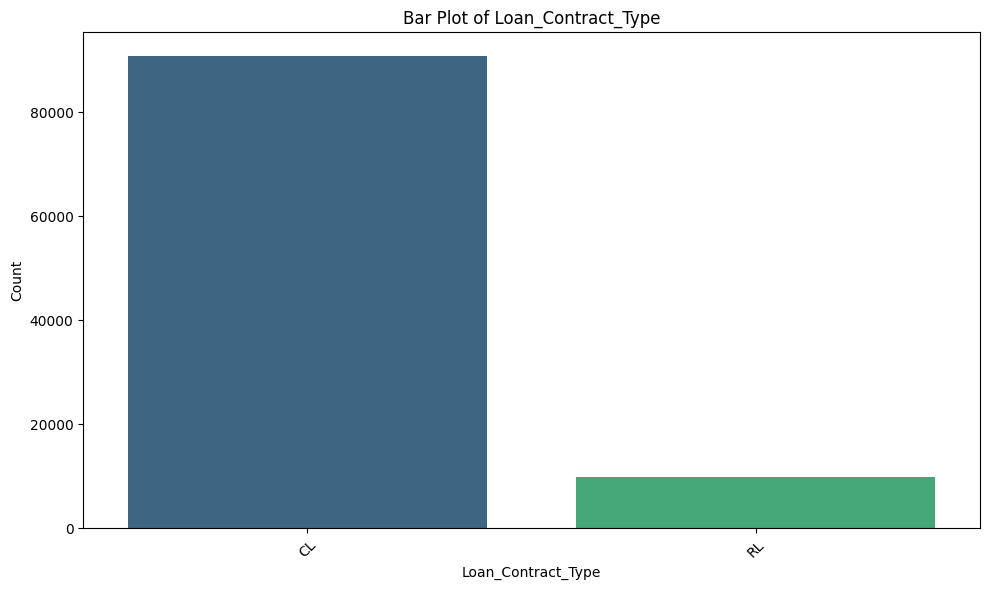

In [41]:
analyze_categorical_column(data, "Loan_Contract_Type")

## Data Processing

In [42]:
data.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Family_Members',
       'Client_City_Rating', 'Application_Process_Day',
       'Application_Process_Hour', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_2',
       'Score_Source_3', 'Phone_Change', 'Credit_Bureau', 'Default'],
      dtype='object')

In [43]:
data.shape

(100694, 36)

In [44]:
data.select_dtypes(include=['object']).columns

Index(['Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization'],
      dtype='object')

In [45]:
pd.crosstab(data['Accompany_Client'], data['Default'])

Default,0,1
Accompany_Client,,
##,7,2
Alone,75153,7207
Group,78,7
Kids,888,62
Others,764,75
Partner,3563,324
Relative,11569,995


In [46]:
retain_categories = ['Alone', 'Relative', 'Partner']

# Replace all other categories with 'Other'
data["Accompany_Client"] = data["Accompany_Client"].apply(lambda x: x if x in retain_categories else 'Other')
data['Accompany_Client'].value_counts()

Accompany_Client
Alone       82360
Relative    12564
Partner      3887
Other        1883
Name: count, dtype: int64

In [47]:
pd.crosstab(data['Client_Income_Type'], data['Default'])

Default,0,1
Client_Income_Type,,
Businessman,1,0
Commercial,25642,2105
Govt Job,7814,484
Maternity leave,2,0
Retired,596,34
Service,57958,6049
Student,8,0
Unemployed,1,0


In [48]:
retain_categories = ['Service', 'Commercial', 'Retired', 'Govt Job']
    
# Replace all other categories with 'Other'
data["Client_Income_Type"] = data["Client_Income_Type"].apply(lambda x: x if x in retain_categories else 'Other')
data["Client_Income_Type"].value_counts()

Client_Income_Type
Service       64007
Commercial    27747
Govt Job       8298
Retired         630
Other            12
Name: count, dtype: int64

In [49]:
pd.crosstab(data['Client_Education'], data['Default'])

Default,0,1
Client_Education,,
Graduation,24417,1337
Graduation dropout,3440,324
Junior secondary,798,114
Post Grad,47,1
Secondary,63320,6896


In [50]:
data["Client_Education"] = data["Client_Education"].replace({'Post Grad': 'Graduation'})
data["Client_Education"].value_counts()

Client_Education
Secondary             70216
Graduation            25802
Graduation dropout     3764
Junior secondary        912
Name: count, dtype: int64

In [51]:
pd.crosstab(data['Client_Marital_Status'], data['Default'])

Default,0,1
Client_Marital_Status,,
D,5644,506
M,70356,6421
S,13551,1576
W,2471,169


In [52]:
pd.crosstab(data['Client_Gender'], data['Default'])

Default,0,1
Client_Gender,,
Female,33435,3820
Male,58584,4852
XNA,3,0


In [53]:
data["Client_Gender"] = data["Client_Gender"].replace({'XNA': 'Male'})
data["Client_Gender"].value_counts()

Client_Gender
Male      63439
Female    37255
Name: count, dtype: int64

In [54]:
pd.crosstab(data['Loan_Contract_Type'], data['Default'])

Default,0,1
Loan_Contract_Type,,
CL,82754,8084
RL,9268,588


In [55]:
pd.crosstab(data['Client_Housing_Type'], data['Default'])

Default,0,1
Client_Housing_Type,,
Family,5060,647
Home,81155,7391
Municipal,3134,310
Office,801,59
Rental,1519,224
Shared,353,41


In [56]:
pd.crosstab(data['Client_Permanent_Match_Tag'], data['Default'])

Default,0,1
Client_Permanent_Match_Tag,,
No,7771,1068
Yes,84251,7604


In [57]:
pd.crosstab(data['Client_Contact_Work_Tag'], data['Default'])

Default,0,1
Client_Contact_Work_Tag,,
No,19708,2120
Yes,72314,6552


In [58]:
pd.crosstab(data['Type_Organization'], data['Default'])
del data['Type_Organization'] # as it has lot of categories

In [59]:
data.shape

(100694, 35)

In [60]:
data['Default'] = data['Default'].replace({'N': 0, 'Y': 1})
data['Default'].value_counts()

Default
0    92022
1     8672
Name: count, dtype: int64

## Feature Engineering

1. Financial Ratios

In [61]:
data["Debt_Income_Ratio"] = data["Credit_Amount"] / data["Client_Income"]
data["Annuity_Income_Ratio"] = data["Loan_Annuity"] / data["Client_Income"]
data["Loan_Duration"] = data["Credit_Amount"] / data["Loan_Annuity"]

2. Employment & Stability Features

In [62]:
data["Age_Years"] = data["Age_Days"] // 365
data["Employed_Years"] = data["Employed_Days"].apply(lambda x: x // 365 if x > 0 else 0)
data["Registration_Years"] = data["Registration_Days"] // 365
data["ID_Years"] = data["ID_Days"] // 365


3. Interaction Features

In [63]:
data["Employment_to_Age_Ratio"] = data["Employed_Years"] / data["Age_Years"]
data["Credit_to_Age_Ratio"] = data["Credit_Amount"] / data["Age_Years"]
data["Family_Size"] = data["Client_Family_Members"] + data["Child_Count"]
data.head()
data.shape

(100694, 45)

## Undersampling

In [73]:
# Step 1: Separate majority and minority classes
data_majority = data[data['Default'] == 0]
data_minority = data[data['Default'] == 1]

# Step 2: Define the percentage for undersampling (e.g., 40%)
undersample_percent = 0.5  # Retain 50% of majority class

# Calculate the number of records to keep from the majority class
n_majority_to_keep = int(len(data_majority) * undersample_percent)
print(n_majority_to_keep)

46011


In [74]:

# Step 3: Downsample the majority class
data_majority_downsampled = resample(
    data_majority,
    replace=False,  # Sample without replacement
    n_samples=n_majority_to_keep,  # Retain only the specified percentage
    random_state=42  # For reproducibility
)

# Step 4: Combine the downsampled majority class with the minority class
data_balanced = pd.concat([data_majority_downsampled, data_minority])

# Step 5: Shuffle the combined dataset
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 6: Check the new class distribution
print("Class distribution after percentage-based undersampling:\n", data_balanced['Default'].value_counts())

Class distribution after percentage-based undersampling:
 Default
0    46011
1     8672
Name: count, dtype: int64


##  One Hot Encoding

In [75]:
# Separate features and target
X = data_balanced.drop(columns=['Default'])
y = data_balanced['Default']

In [76]:
X = pd.get_dummies(X, drop_first=True)  # Convert categorical features to numerical

## Train Test SPlit

In [77]:
# Step 3: Train-Test Split (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train shape: (43746, 57)
X_test shape: (10937, 57)
y_train: (43746,)
y_test: (10937,)


### Standardization

In [79]:
# Step 4: Standardize numerical features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building

### 1. Base Model Logistic Regression

In [ ]:
# Step 6: Train Logistic Regression Model
random.seed(42)

model = LogisticRegression(penalty='l1', C=0.01, max_iter=500, class_weight='balanced', solver='liblinear', random_state=42)

# model = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test_scaled)

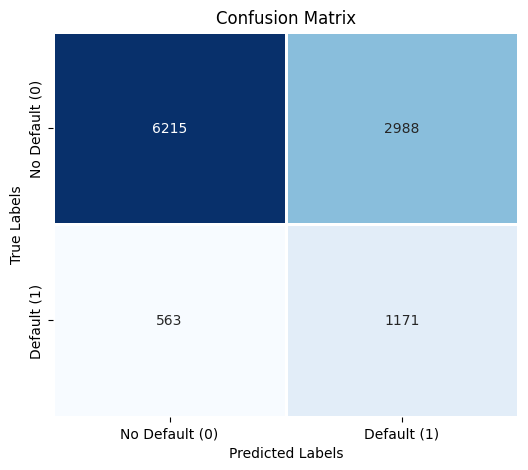

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=2, cbar=False, xticklabels=["No Default (0)", "Default (1)"], yticklabels=["No Default (0)", "Default (1)"])

# Formatting
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Model Evaluation Functions

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluates a trained model on both train and test datasets.

    Parameters:
    - model: Trained model (e.g.LogisticRegression, XGBoost, RandomForest etc.)
    - X_train, y_train: Training data
    - X_test, y_test: Test data

    Returns:
    - Dictionary containing train and test metrics
    """
    metrics = {}

    #Train Predictions
    train_pred = model.predict(X_train)
    train_prob = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None

    #Test Predictions
    test_pred = model.predict(X_test)
    test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        "Metric": ["Precision", "Recall", "F1 Score", "ROC-AUC"],
        "Train": [
            precision_score(y_train, train_pred),
            recall_score(y_train, train_pred),
            f1_score(y_train, train_pred),
            roc_auc_score(y_train, train_prob) if train_prob is not None else "N/A"
        ],
        "Test": [
            precision_score(y_test, test_pred),
            recall_score(y_test, test_pred),
            f1_score(y_test, test_pred),
            roc_auc_score(y_test, test_prob) if test_prob is not None else "N/A"
        ]
    }

    df_metrics = pd.DataFrame(metrics)

    return df_metrics

In [94]:
def plot_roc_curve(model, X_test, y_test):
    """
    Plots the ROC Curve for a given model.

    Parameters:
    - model: Trained model (e.g., XGBoost, LightGBM, LogisticRegression)
    - X_test: Test features
    - y_test: True test labels
    """
    # Compute ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    if y_prob is None:
        print(" Model does not support probability predictions.")
        return

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random model baseline
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [93]:
evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

,Metric,Train,Test
0,Precision,0.275510,0.281558
1,Recall,0.668204,0.675317
2,F1 Score,0.390154,0.397421
3,ROC-AUC,0.728705,0.734540


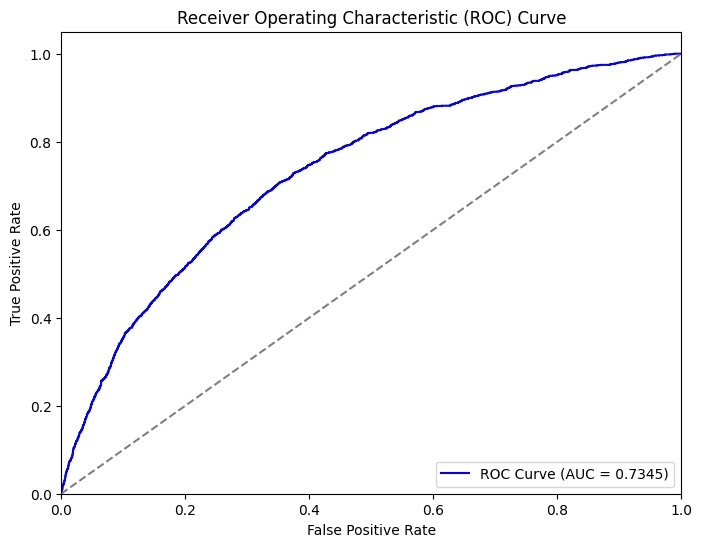

In [95]:
plot_roc_curve(model, X_test_scaled, y_test)

In [96]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': abs(model.coef_[0])  # Absolute values of coefficients
}).sort_values(by='Importance', ascending=False)

In [97]:
feature_importance

,Feature,Importance
22,Score_Source_3,0.460614
21,Score_Source_2,0.377969
44,Client_Education_Secondary,0.217384
48,Client_Gender_Male,0.170744
29,Employed_Years,0.121377
2,Car_Owned,0.107764
49,Loan_Contract_Type_RL,0.097269
26,Annuity_Income_Ratio,0.095829
18,Client_City_Rating,0.084165
13,ID_Days,0.062913


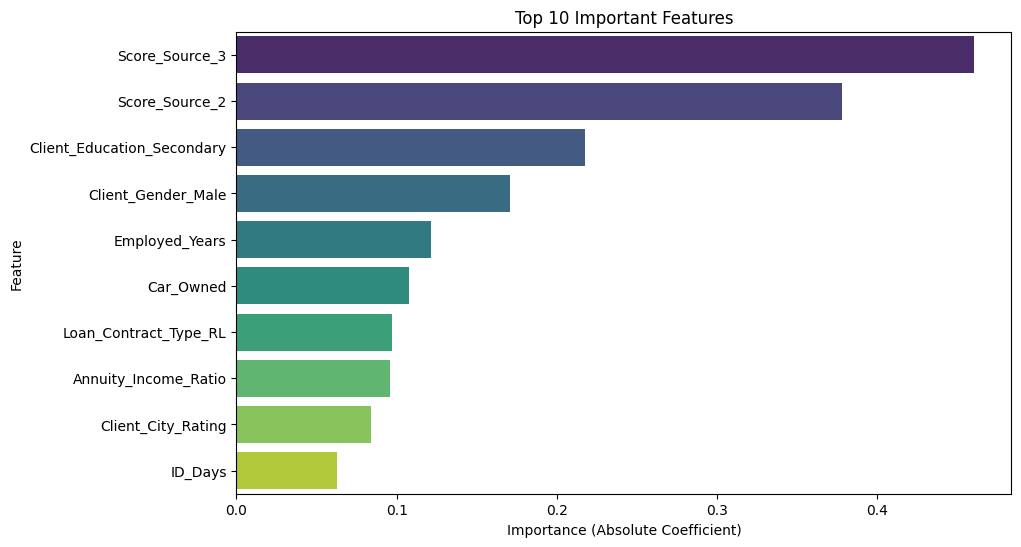

In [98]:
# Optional: Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Importance (Absolute Coefficient)')
plt.ylabel('Feature')
plt.show()

### 1.1 Logistic Regression Model (L1 Regularization - Feature Selection)

In [ ]:
cols_to_drop = ["ID_Years", "Application_Process_Hour", "Application_Process_Day", "Credit_to_Age_Ratio",
 "Registration_Years", "Credit_Bureau", "Client_Contact_Work_Tag", "Accompany_Client",
 "Debt_Income_Ratio", "Loan_Annuity", "Bike_Owned", "Family_Size", "Client_Income"]

data_balanced.drop(columns=cols_to_drop, inplace=True)


In [108]:
# Separate features and target
X = data_balanced.drop(columns=['Default'])
y = data_balanced['Default']

X = pd.get_dummies(X, drop_first=True)  # Convert categorical features to numerical

# Step 3: Train-Test Split (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

### Standardization
# Step 4: Standardize numerical features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train shape: (43746, 42)
X_test shape: (10937, 42)
y_train: (43746,)
y_test: (10937,)


In [109]:
random.seed(42)

model = LogisticRegression(penalty='l1', C=0.01, max_iter=500, class_weight='balanced', solver='liblinear', random_state=42)

model.fit(X_train_scaled, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test_scaled)

In [110]:
evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

,Metric,Train,Test
0,Precision,0.275606,0.282033
1,Recall,0.668636,0.675317
2,F1 Score,0.390324,0.397893
3,ROC-AUC,0.728489,0.734415


### 2. Random Forest Classifier

In [111]:
# Step 1: Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=600,max_depth=6, min_samples_leaf=8,random_state=42, class_weight='balanced')  # Adjust for class imbalance
rf_model.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  

In [112]:
evaluate_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test)

,Metric,Train,Test
0,Precision,0.188776,0.191408
1,Recall,0.910061,0.919839
2,F1 Score,0.312690,0.316877
3,ROC-AUC,0.679468,0.678863


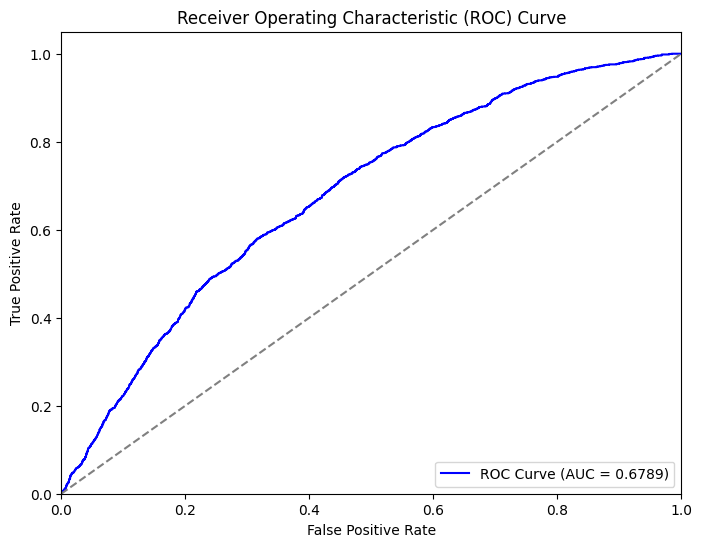

In [113]:
plot_roc_curve(rf_model, X_test_scaled, y_test)

## Decision Tree Classifier

In [114]:
# Step 1: Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    criterion='gini',  
    max_depth=8,  # Limits tree depth to prevent overfitting
    min_samples_split=10,  # Minimum samples required to split a node
    class_weight='balanced',  # Handles class imbalance
    random_state=42
)

dt_model.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1] 

In [115]:
evaluate_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test)

,Metric,Train,Test
0,Precision,0.188776,0.191408
1,Recall,0.910061,0.919839
2,F1 Score,0.312690,0.316877
3,ROC-AUC,0.679468,0.678863


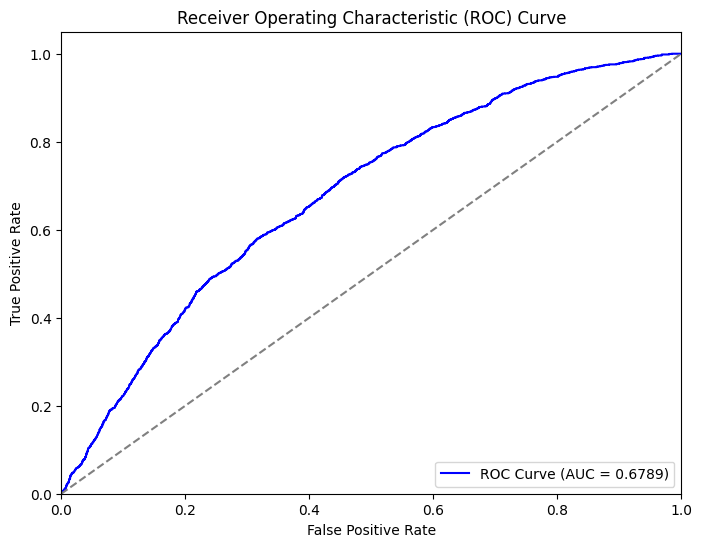

In [116]:
plot_roc_curve(rf_model, X_test_scaled, y_test)